In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from scipy.optimize import minimize

In [3]:
data = pd.read_csv("E:\Study\Python\Assignments\machine-learning-ex2\machine-learning-ex2\ex2\ex2data1.txt",names=['Exam1','Exam2','Admitted'])

In [4]:
data.shape

(100, 3)

In [5]:
data.head(5)

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


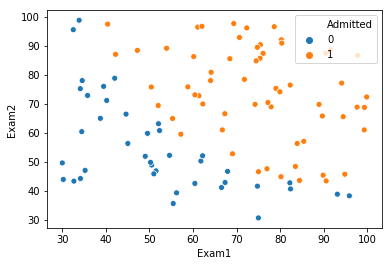

In [6]:
sns.scatterplot(x='Exam1',y='Exam2',data=data, hue='Admitted')

In [7]:
theta = np.array([0,0,0])

In [8]:
theta

array([0, 0, 0])

In [9]:
m,n = data.shape

In [10]:
X= np.c_[np.ones(m), data.iloc[:,0:2]]
Y = np.c_[data.iloc[:,2]]

In [11]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [12]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [13]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [14]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, Y)
grad = gradient(initial_theta, X, Y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.6931471805599453
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [15]:
res = minimize(costFunction, initial_theta, args=(X,Y), method=None, jac=gradient, options={'maxiter':400})
res

c:\users\saachi\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\saachi\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


      fun: 0.2034977015895099
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557640e-09,  4.36433474e-07, -1.39671758e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

In [16]:
data.isnull().any()

Exam1       False
Exam2       False
Admitted    False
dtype: bool